# Домашнее задание №4

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
import io
import requests
data=pd.read_csv('data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

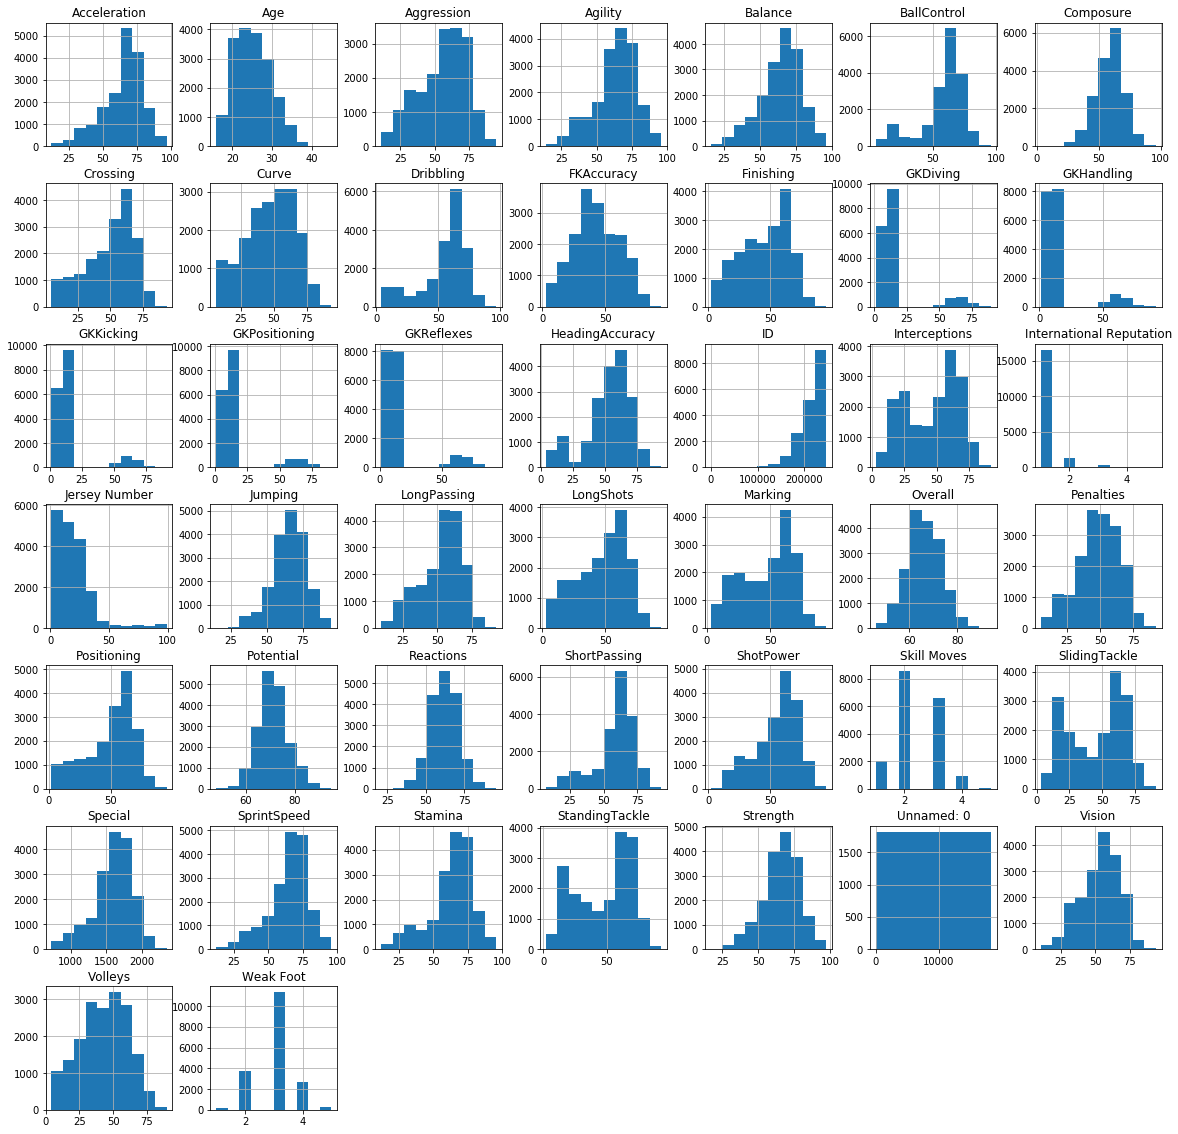

In [3]:
data.hist(figsize=(20,20))
plt.show()

*в данном датасете, присутствую графики нормального распределения , биномиальные, равномерные, бернули и др.*

Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

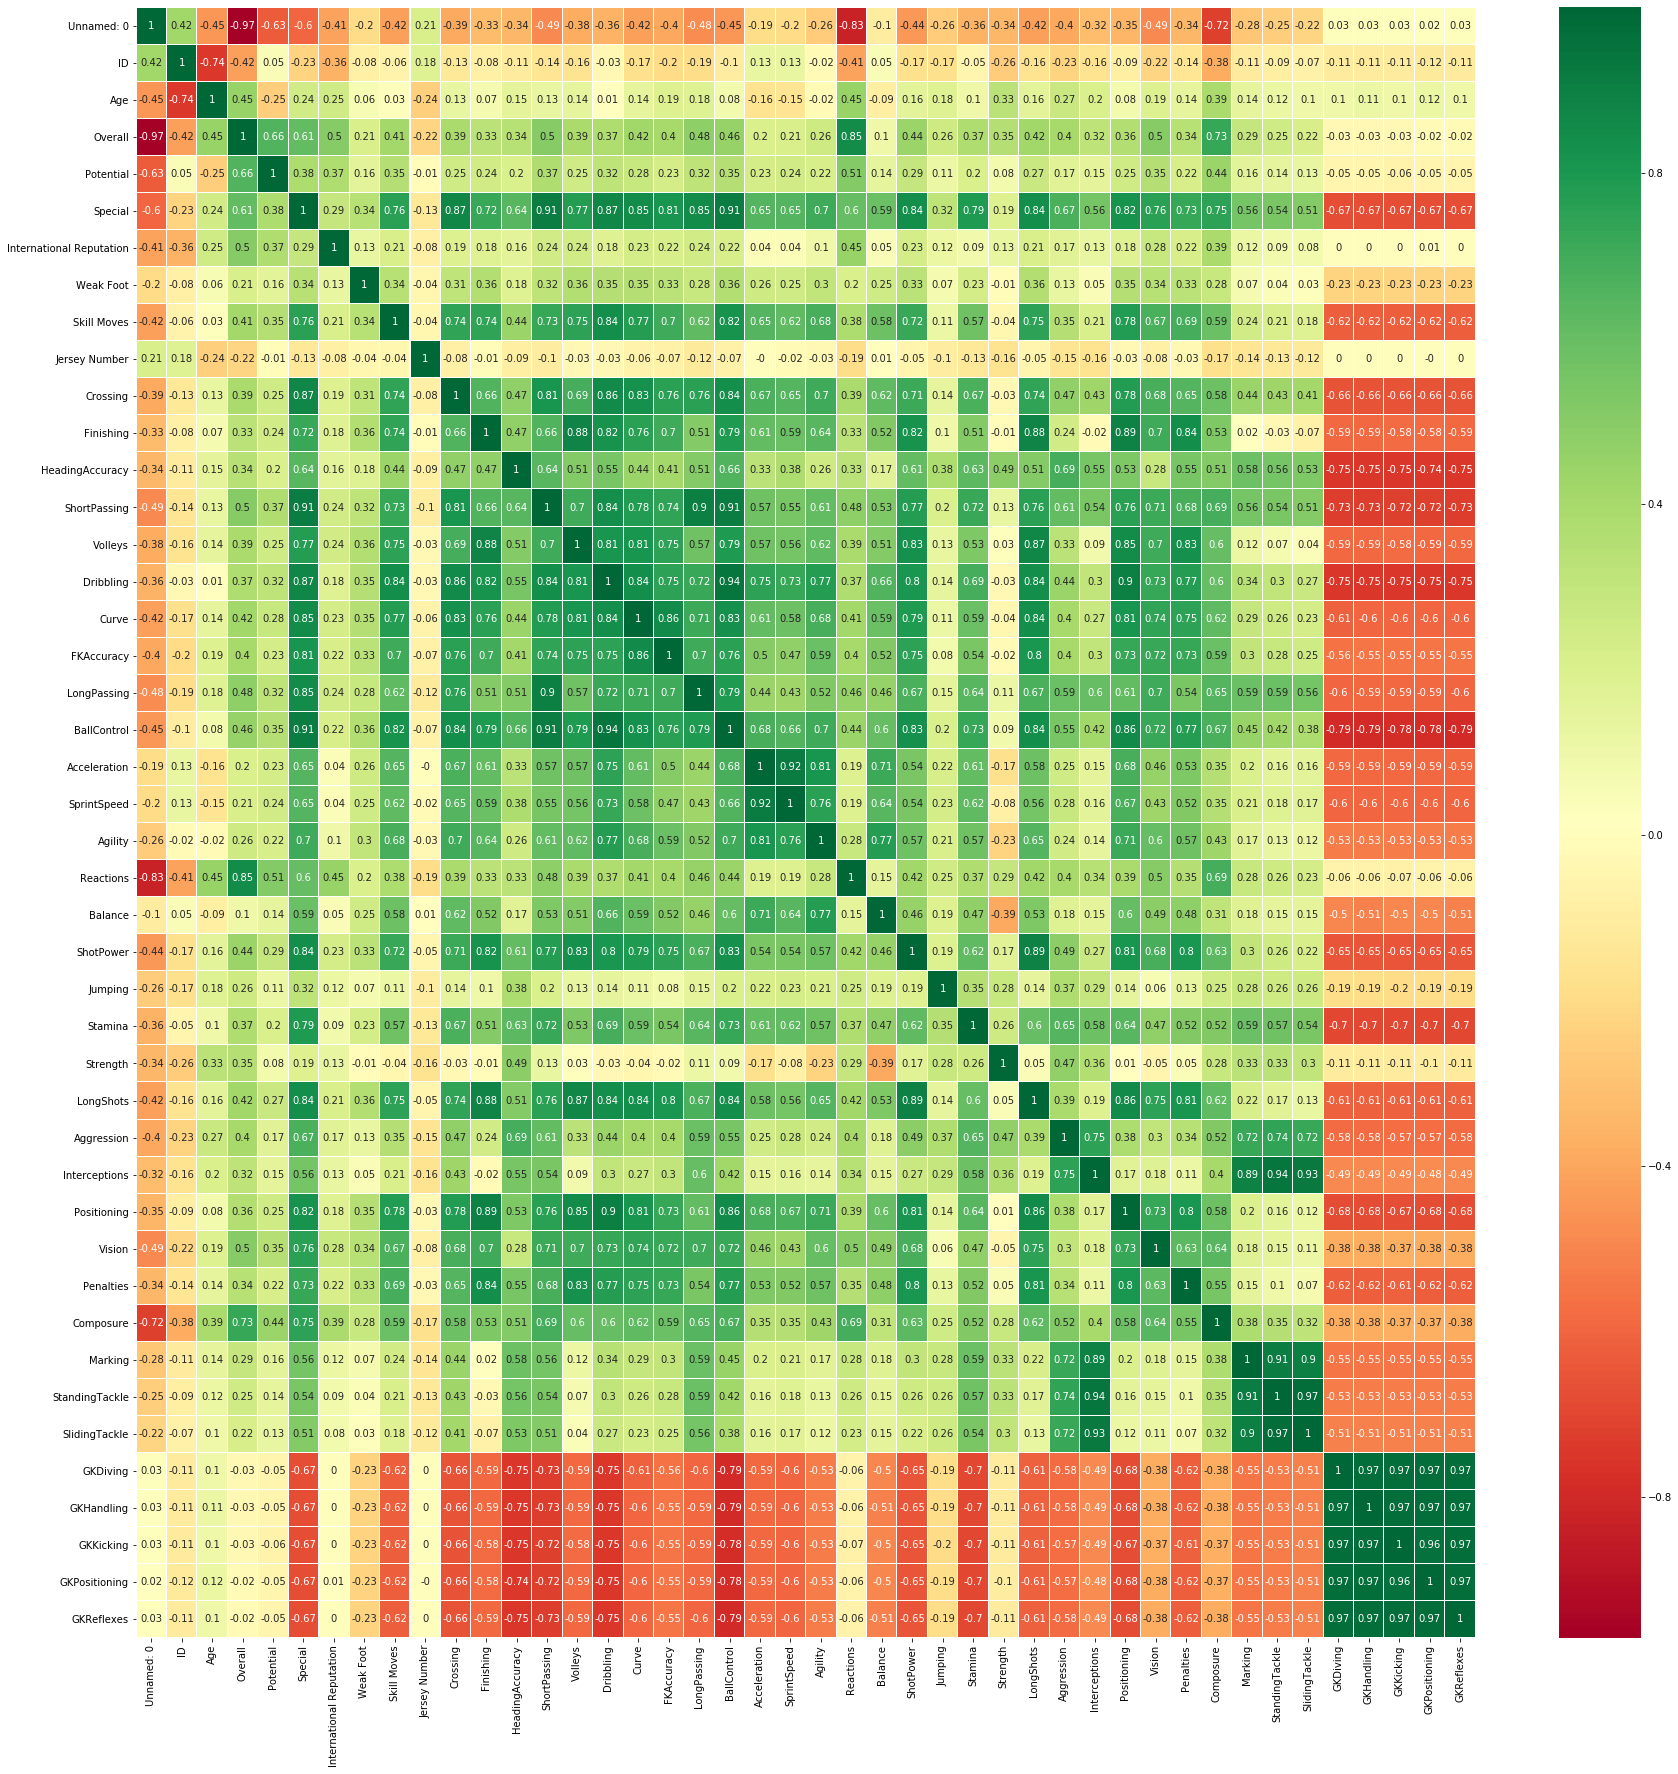

In [4]:
correlation_matrix = data.corr(method ='pearson').round(2).T
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',linewidths=0.01, annot=True,yticklabels=True,xticklabels=True)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [5]:
correlation_matrix['Overall']

Unnamed: 0                 -0.97
ID                         -0.42
Age                         0.45
Overall                     1.00
Potential                   0.66
Special                     0.61
International Reputation    0.50
Weak Foot                   0.21
Skill Moves                 0.41
Jersey Number              -0.22
Crossing                    0.39
Finishing                   0.33
HeadingAccuracy             0.34
ShortPassing                0.50
Volleys                     0.39
Dribbling                   0.37
Curve                       0.42
FKAccuracy                  0.40
LongPassing                 0.48
BallControl                 0.46
Acceleration                0.20
SprintSpeed                 0.21
Agility                     0.26
Reactions                   0.85
Balance                     0.10
ShotPower                   0.44
Jumping                     0.26
Stamina                     0.37
Strength                    0.35
LongShots                   0.42
Aggression

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

*С переменной Overall сильнее всего коррелируют Potential  и  Reactions*

In [6]:
data['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Eritrea                    2
Chad                       2
Uzbekistan                 2
Hong Kong     

Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

In [10]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

In [14]:
data_new = pd.get_dummies(data, columns = ["Preferred Foot","Body Type"], prefix=["Preferred Foot","Body Type"])
data_new.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Body Type_Akinfenwa,Body Type_C. Ronaldo,Body Type_Courtois,Body Type_Lean,Body Type_Messi,Body Type_Neymar,Body Type_Normal,Body Type_PLAYER_BODY_TYPE_25,Body Type_Shaqiri,Body Type_Stocky
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,0,0,0,0,1,0,0,0,0,0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,0,1,0,0,0,0,0,0,0,0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,0,0,0,0,0,1,0,0,0,0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,0,0,0,1,0,0,0,0,0,0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,0,0,0,0,0,0,1,0,0,0


*мы переводим классы в вектора, для того, чтобы их можно было сравнивать.*

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

*мы посмотрим матрицу корреляции, для того, чтобы понять, какие параметры нам брать для линейной регрессии а ещё мы удалим те переменные, которые слишком хорошо коррелирую между собой, если такие есть, т.к. это лишняя информация*

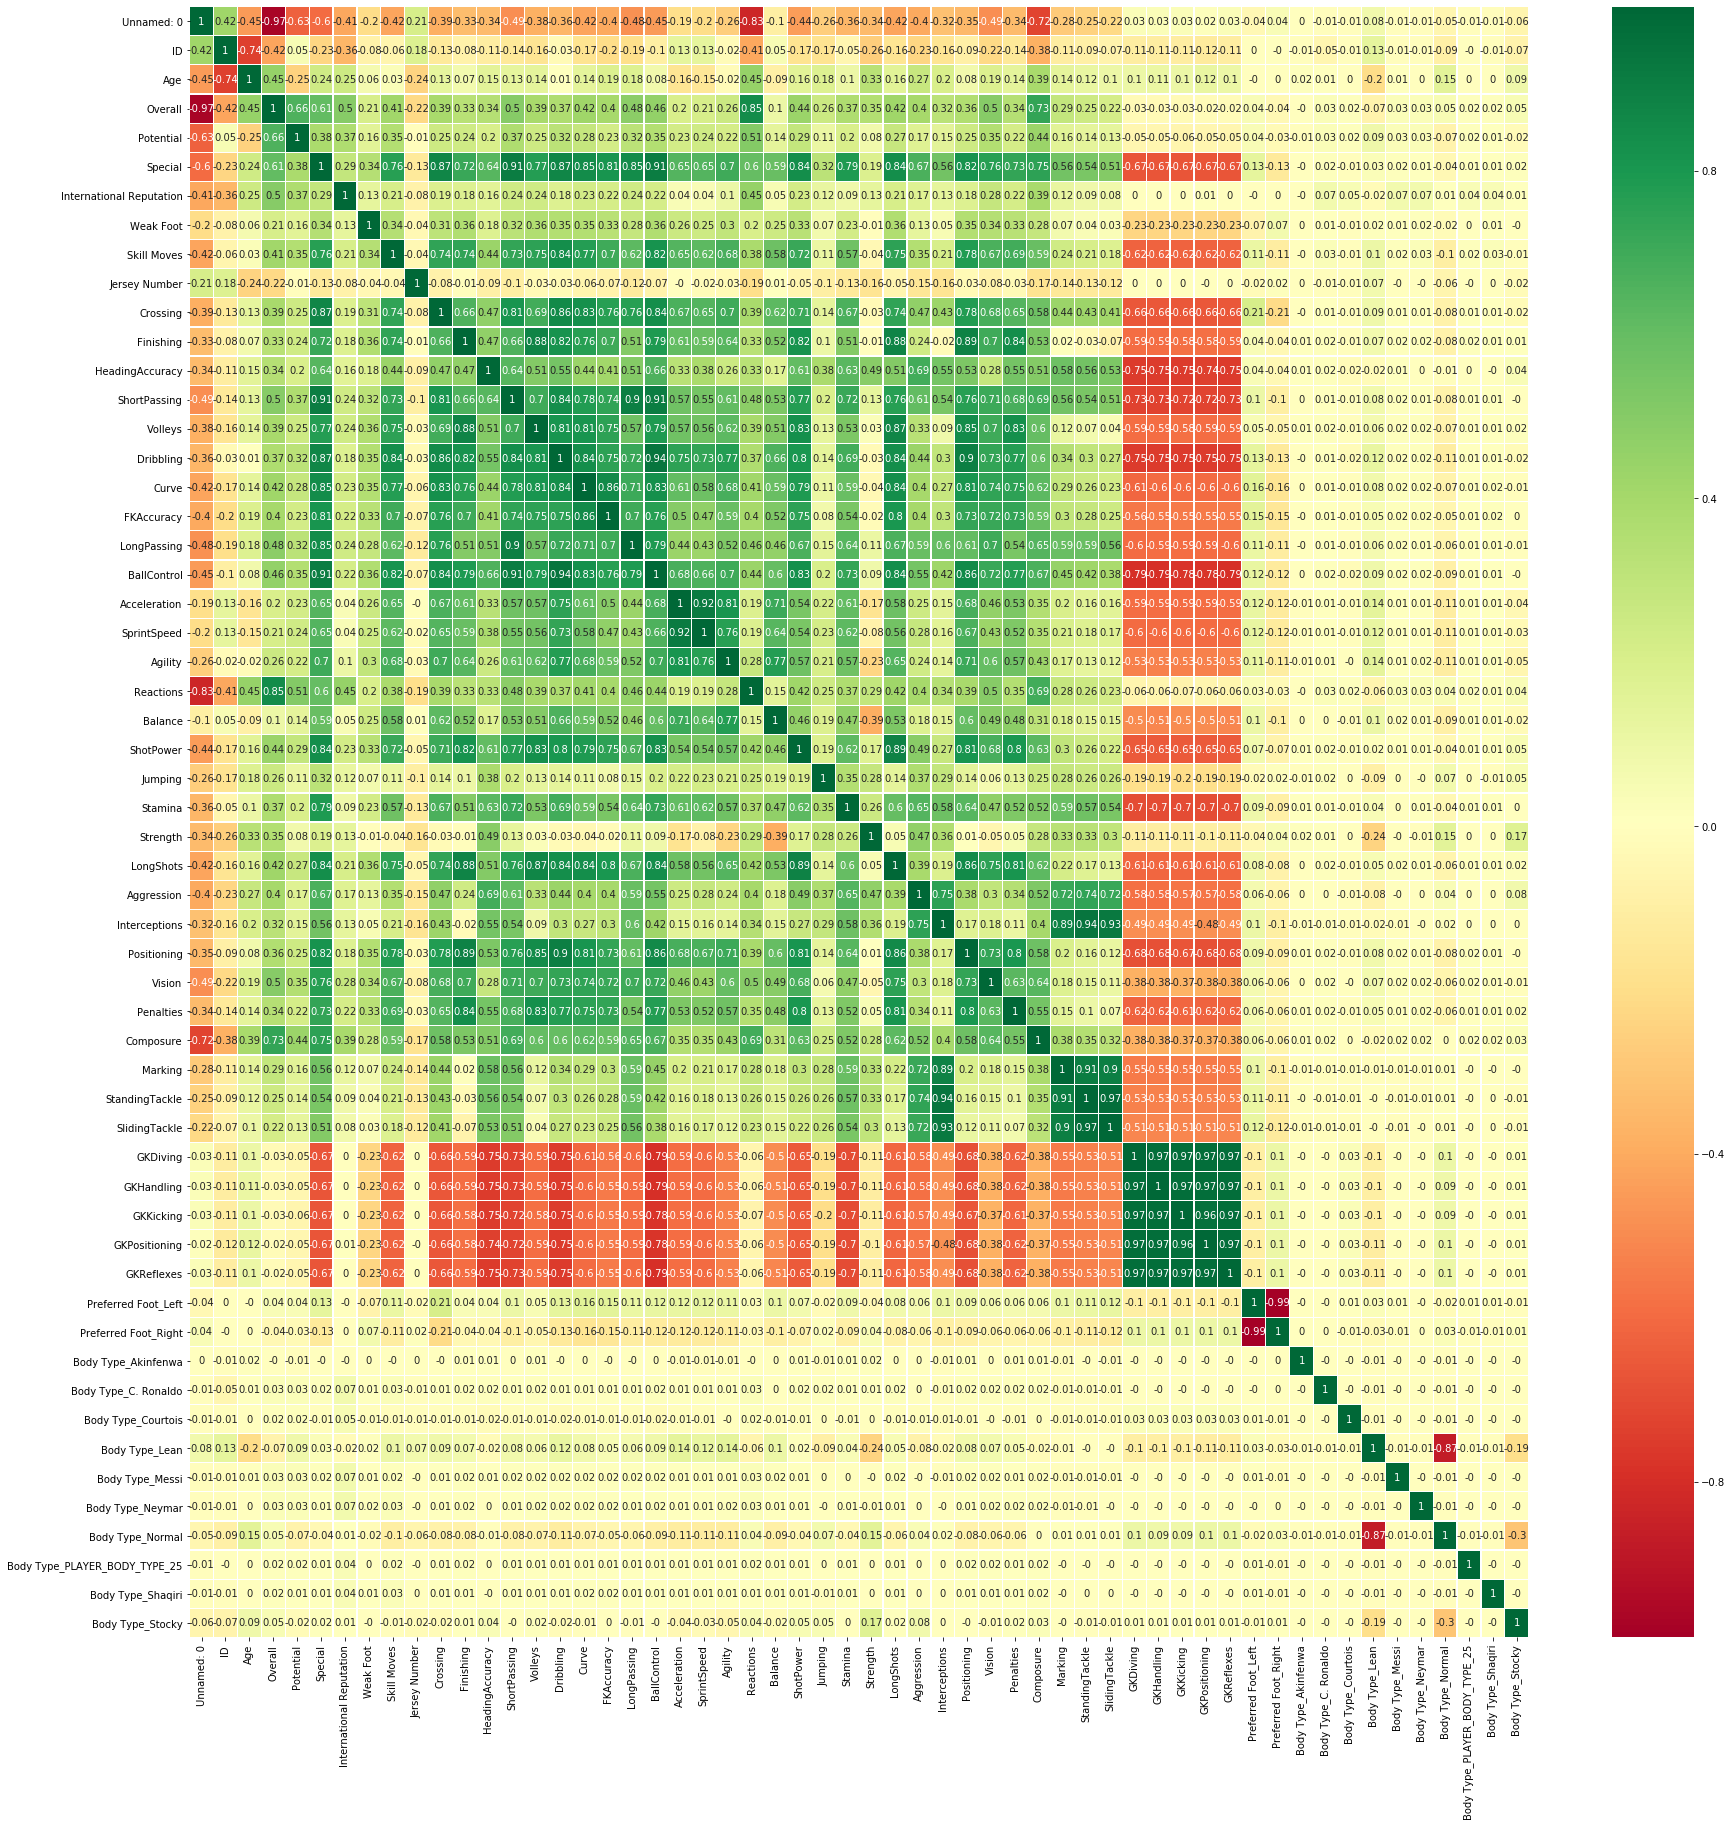

In [17]:
correlation_matrix = data_new.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2,yticklabels=True,xticklabels=True)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [18]:
corr_matrix = data_new.corr().abs()

# выбирается верхний треугольник матрицы корелляций (она же симметрична)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# найдем индексы колонок с корелляцией больше чем 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['Age', 'Overall', 'Skill Moves', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Stamina', 'LongShots', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot_Right', 'Body Type_Normal']


In [19]:
data_new = data_new.drop(data_new[to_drop], axis=1)

Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

In [74]:
import re
test = 'Mr. Griezmann'

def point_parser(name):
    title_search = re.search('\.', name)
    if title_search:
        return re.split('\.', test)[1].strip()
    return name
point_parser(test)

'Griezmann'

In [76]:
import re

def point_parser(name):
    title_search = re.search('\.', name)
    if title_search:
        return re.split('\.', test)[1].strip()
    return name


data_new['clean_name'] = data_new['Name'].apply(point_parser)
    

In [79]:
data_new['clean_name'].value_counts().head()

Griezmann    15179
Paulinho         8
Felipe           6
Danilo           5
Fernando         4
Name: clean_name, dtype: int64

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

In [101]:
data_new['Value_clean'] = data_new.apply(lambda x: (re.sub('[€,M]','',x['Value'])), axis=1)
# создаём столбец в котором избавляемся от всего лишнего
data_new['Value_clean']= data_new['Value_clean'].convert_objects(convert_numeric=True)
# преобразуем наш новый столбец в числовой, чтобы можно было смотреть корреляцию по нему

In [116]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 66 columns):
Unnamed: 0                       18207 non-null int64
ID                               18207 non-null int64
Name                             18207 non-null object
Photo                            18207 non-null object
Nationality                      18207 non-null object
Flag                             18207 non-null object
Potential                        18207 non-null int64
Club                             17966 non-null object
Club Logo                        18207 non-null object
Value                            18207 non-null object
Wage                             18207 non-null object
Special                          18207 non-null int64
International Reputation         18159 non-null float64
Weak Foot                        18159 non-null float64
Work Rate                        18159 non-null object
Real Face                        18159 non-null object
Position     

In [121]:
data['Value_clean'] = data.apply(lambda x: (re.sub('[€,M]','',x['Value'])), axis=1)
# создаём столбец в котором избавляемся от всего лишнего
data['Value_clean']= data['Value_clean'].convert_objects(convert_numeric=True)
# преобразуем наш новый столбец в числовой, чтобы можно было смотреть корреляцию по нему

c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
data_new.corr(method ='pearson').round(2)['Value_clean']

Unnamed: 0                      -0.55
ID                              -0.11
Potential                        0.65
Special                          0.33
International Reputation         0.63
Weak Foot                        0.14
Jersey Number                   -0.07
HeadingAccuracy                  0.11
Jumping                          0.08
Strength                         0.07
Aggression                       0.11
Preferred Foot_Left              0.01
Body Type_Akinfenwa               NaN
Body Type_C. Ronaldo             0.11
Body Type_Courtois               0.07
Body Type_Lean                   0.02
Body Type_Messi                  0.16
Body Type_Neymar                 0.17
Body Type_PLAYER_BODY_TYPE_25    0.09
Body Type_Shaqiri                0.02
Body Type_Stocky                -0.01
Value_clean                      1.00
Name: Value_clean, dtype: float64

In [18]:
corr_matrix = data_new.corr().abs()

# выбирается верхний треугольник матрицы корелляций (она же симметрична)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# найдем индексы колонок с корелляцией больше чем 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['Age', 'Overall', 'Skill Moves', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Stamina', 'LongShots', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot_Right', 'Body Type_Normal']


In [137]:
data_new['Value_clean'].fillna(data_new['Value_clean'].median(), inplace = True)

In [140]:
from sklearn.linear_model import LinearRegression
Potential = data_new['Potential']
Value_clean = data_new['Value_clean']
model = LinearRegression()
result = model.fit(np.array(Potential).reshape(-1,1), Value_clean)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -23.598377156350203
slope: [0.38672729]


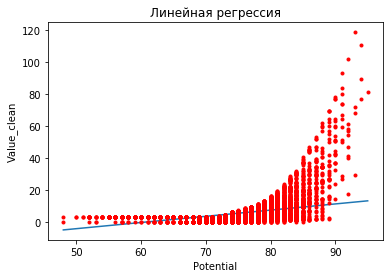

In [142]:
plt.xlabel('Potential')
plt.ylabel('Value_clean')
plt.title('Линейная регрессия')
x = np.linspace(min(Potential), max(Potential), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Potential, Value_clean, 'r.')
plt.show()

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?